In [25]:
import matplotlib
import pandas as pd


import numpy as np
from matplotlib import pyplot as plt

base_cleo = '3_test_mirador_'
base_mir = '4_test_mirador_'
test_set = [1, 20,40,80,160,320]
test_cat = np.array(test_set).astype(str)

df = pd.read_csv('3_test_mirador_df_stats.csv')
df_users = pd.read_csv('3_test_mirador_df_users.csv')
df_4 = pd.read_csv('4_test_mirador_df_stats.csv')
df_users_4 = pd.read_csv('4_test_mirador_df_users.csv')
df_cleo = pd.read_csv('2_test_cleopatra_mongo_df_stats.csv')
df_cleo_users = pd.read_csv('2_test_cleopatra_mongo_df_users.csv')
# df_cleo = pd.read_csv('3_test_cleopatra_df_stats.csv')
# df_cleo_users = pd.read_csv('3_test_cleopatra_df_users.csv')

[0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


<Figure size 640x480 with 0 Axes>

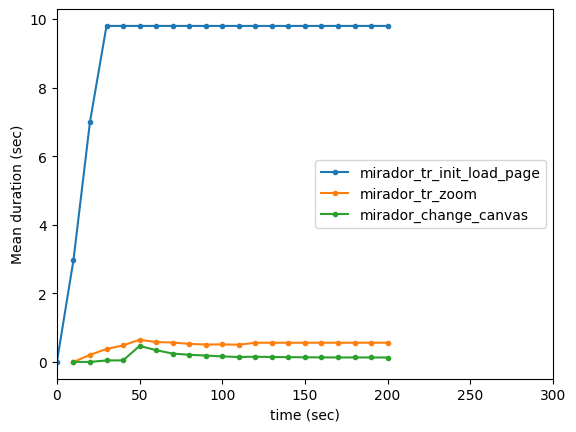

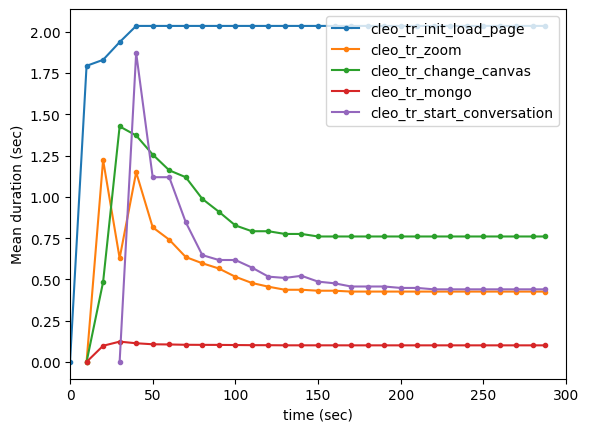

In [26]:
plt.figure()
fig, ax = plt.subplots()
n_users = 40
change_canvas = None
change_canvas_times = None
n_canvas = None
for test in [n_users]:
    for parameter in ['tr_init_load_page', 'tr_zoom']:
        df_plot =  df.loc[(df['users']==test) & (df['parameter']==parameter)]
        plt.plot(df_plot['time'], df_plot['meanfb']/1000,'.-', label='mirador_'+parameter)

    for parameter in ['tr_change_canvas','tr_change_manually_canvas_2','tr_change_manually_canvas']:
        df_plot =  df.loc[(df['users']==test) & (df['parameter']==parameter)]
        if change_canvas is None:
            change_canvas = np.zeros(len(df_plot['time']))
            n_canvas = np.zeros(len(df_plot['time']))
            change_canvas_times = df_plot['time'].values
        else:
            for i in range(len(df_plot)):
              temp_index = np.where(change_canvas_times == df_plot.iloc[i]["time"])[0]
              change_canvas[temp_index] += df_plot.iloc[i]["meanfb"]
              n_canvas[temp_index] += 1
    for i in range(len(change_canvas)):
        change_canvas[i] = change_canvas[i]/(n_canvas[i]+1)
    print(n_canvas)
    plt.plot(change_canvas_times, change_canvas/1000,'.-', label='mirador_change_canvas')




plt.xlabel("time (sec)")
plt.ylabel("Mean duration (sec)")
plt.xlim(0,300)
# plt.ylim(0,16)
plt.legend()
plt.show()
plt.figure()
for test in [n_users]:
    for parameter in ['tr_init_load_page', 'tr_zoom', 'tr_change_canvas',  'tr_mongo', 'tr_start_conversation']:
        df_plot = df_cleo.loc[(df_cleo['users'] == test) & (df_cleo['parameter'] == parameter)]
        plt.plot(df_plot['time'], df_plot['meanfb']/1000, '.-', label='cleo_' + parameter)
plt.xlabel("time (sec)")
plt.ylabel("Mean duration (sec)")
plt.xlim(0,300)
# plt.ylim(0,16)
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

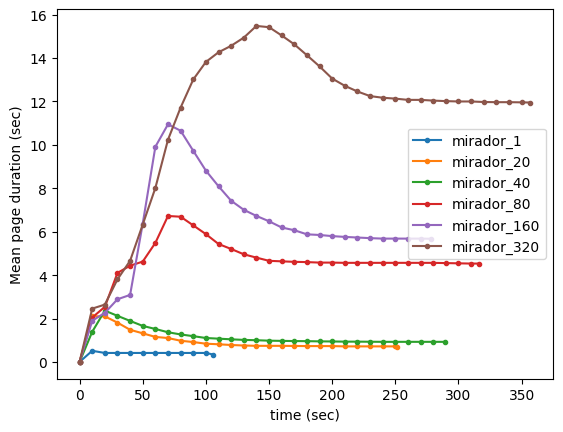

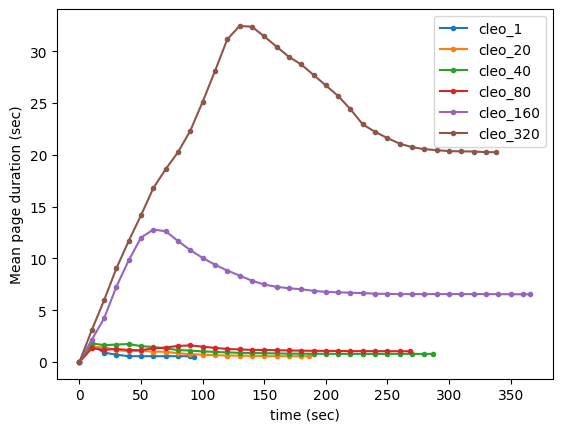

In [27]:
plt.figure()
fig, ax = plt.subplots()
for test in test_set:
    df_plot =  df_4.loc[(df_4['users']==test) & (df_4['parameter']=='page')]
    plt.plot(df_plot['time'], df_plot['meanfb']/1000,'.-', label='mirador_'+str(test))
plt.xlabel("time (sec)")
plt.ylabel("Mean page duration (sec)")
# plt.ylim(0,20)
plt.legend()
plt.show()
plt.figure()
for test in test_set:
    df_plot = df_cleo.loc[(df_cleo['users'] == test) & (df_cleo['parameter'] == 'page')]
    plt.plot(df_plot['time'], df_plot['meanfb']/1000, '.-', label='cleo_' + str(test))
plt.xlabel("time (sec)")
plt.ylabel("Mean page duration (sec)")
# plt.ylim(0,20)
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

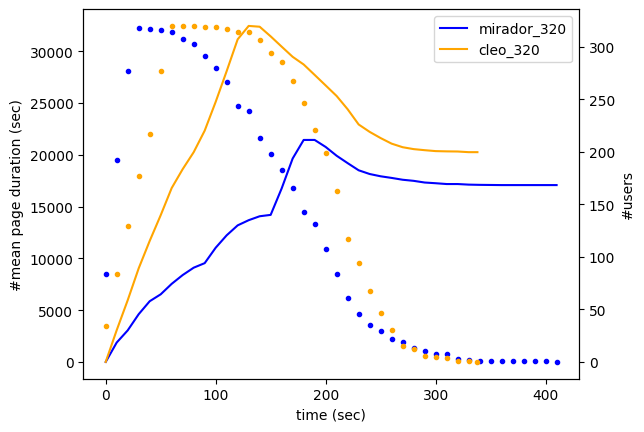

In [28]:
plt.figure()
fig, ax = plt.subplots()
for test in [320]:
    df_plot =  df.loc[(df['users']==test) & (df['parameter']=='page')]
    ax.plot(df_plot['time'], df_plot['meanfb'],'-', color='blue', label='mirador_'+str(test))
for test in [320]:
    df_plot = df_cleo.loc[(df_cleo['users'] == test) & (df_cleo['parameter'] == 'page')]
    ax.plot(df_plot['time'], df_plot['meanfb'], '-', color='orange', label='cleo_' + str(test))
    ax.set_xlabel("time (sec)")
    ax.set_ylabel("#mean page duration (sec)")
ax2=ax.twinx()
for test in [320]:
    df_plot = df_users.loc[df_users['users']==test]
    ax2.plot(df_plot['time'], df_plot['connected'],'.', color='blue', label='mirador_users_'+str(test))
for test in [320]:
    df_plot = df_cleo_users.loc[df_cleo_users['users']==test]
    ax2.plot(df_plot['time'], df_plot['connected'],'.', color='orange', label='cleo_users_'+str(test))
    ax2.set_ylabel("#users")

ax.legend()
plt.show()

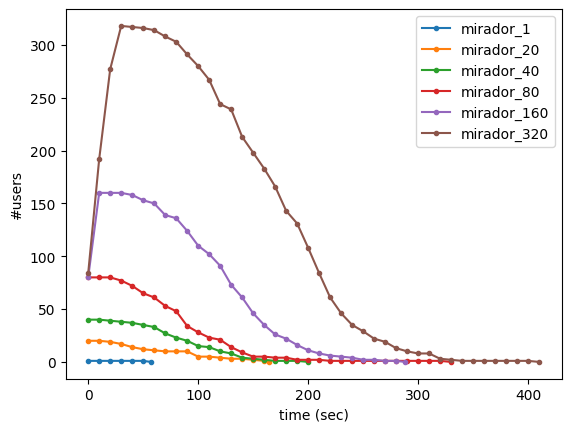

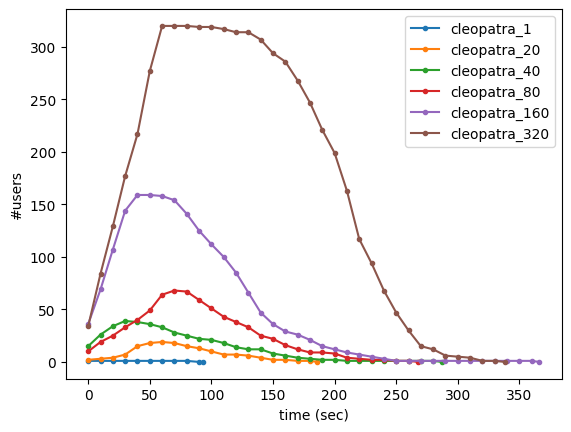

In [29]:
plt.figure()

for test in test_set:
    df_plot = df_users.loc[df_users['users']==test]
    plt.plot(df_plot['time'], df_plot['connected'],'.-', label='mirador_'+str(test))
    plt.xlabel("time (sec)")
    plt.ylabel("#users")
plt.legend()
plt.figure()
for test in test_set:
    df_plot = df_cleo_users.loc[df_cleo_users['users']==test]
    plt.plot(df_plot['time'], df_plot['connected'], '.-', label='cleopatra_'+str(test))
    plt.xlabel("time (sec)")
    plt.ylabel("#users")
plt.legend()
plt.show()

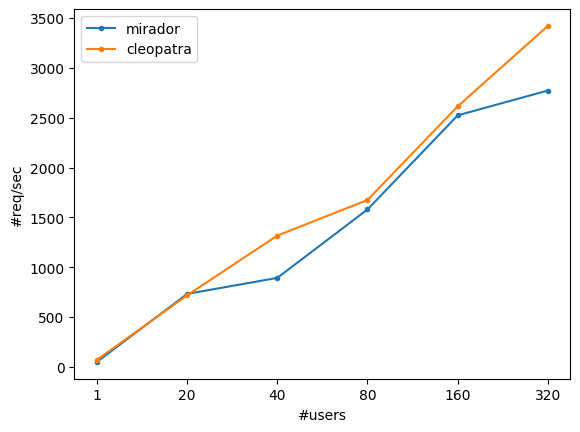

In [30]:
plt.figure()
max_rate = []
for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='request')]
    max_rate.append(df_plot['rate'].max())
plt.plot(test_cat, max_rate, '.-',label='mirador')
max_rate = []
for test in test_set:
    df_plot = df_cleo.loc[(df['users']==test) & (df_cleo['parameter']=='request')]
    max_rate.append(df_plot['rate'].max())
plt.plot(test_cat, max_rate, '.-',label='cleopatra')
plt.ylabel("#req/sec")
plt.xlabel("#users")
plt.legend()
plt.show()

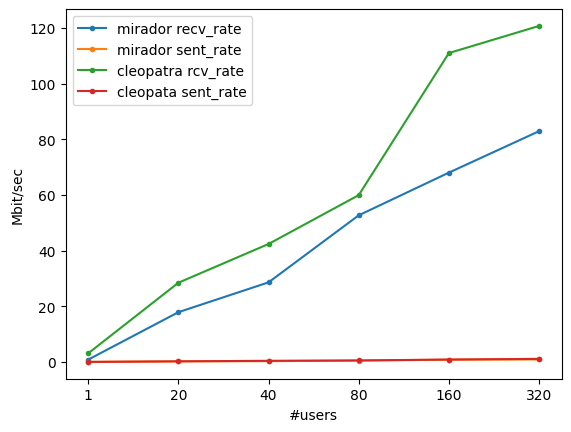

In [31]:
plt.figure()
max_rate = []

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='size_rcv')]
    max_rate.append(df_plot['rate'].max())
plt.plot(test_cat, np.array(max_rate)/(1024*1024), '.-',label='mirador recv_rate')
max_rate = []

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='size_sent')]
    max_rate.append(df_plot['rate'].max())
plt.plot(test_cat, np.array(max_rate)/(1024*1024), '.-',label='mirador sent_rate')
max_rate = []
for test in test_set:
    df_plot = df_cleo.loc[(df['users']==test) & (df_cleo['parameter']=='size_rcv')]
    max_rate.append(df_plot['rate'].max())
plt.plot(test_cat, np.array(max_rate)/(1024*1024), '.-',label='cleopatra rcv_rate')

max_rate = []
for test in test_set:
    df_plot = df_cleo.loc[(df['users']==test) & (df_cleo['parameter']=='size_sent')]
    max_rate.append(df_plot['rate'].max())
plt.plot(test_cat, np.array(max_rate)/(1024*1024), '.-',label='cleopata sent_rate')
plt.ylabel("Mbit/sec")
plt.xlabel("#users")
plt.legend()
plt.show()

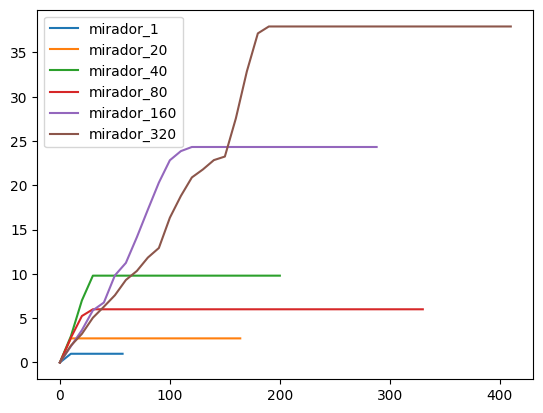

In [32]:
plt.figure()

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='tr_init_load_page')]
    plt.plot(df_plot['time'], df_plot['meanfb']/1000, label='mirador_'+str(test))
plt.legend()
plt.show()

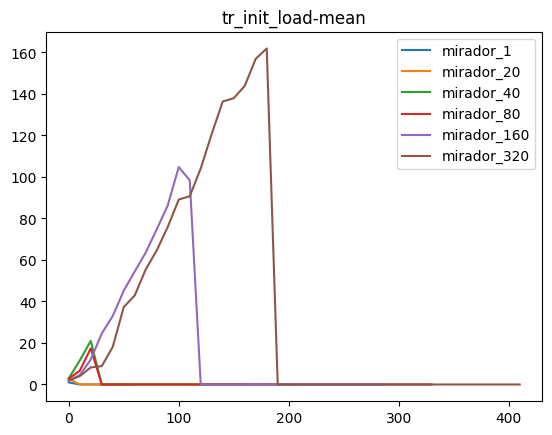

In [33]:
plt.figure()

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='tr_init_load_page')]
    plt.plot(df_plot['time'], df_plot['mean']/1000, label='mirador_'+str(test))
plt.legend()
plt.title('tr_init_load-mean')
plt.show()

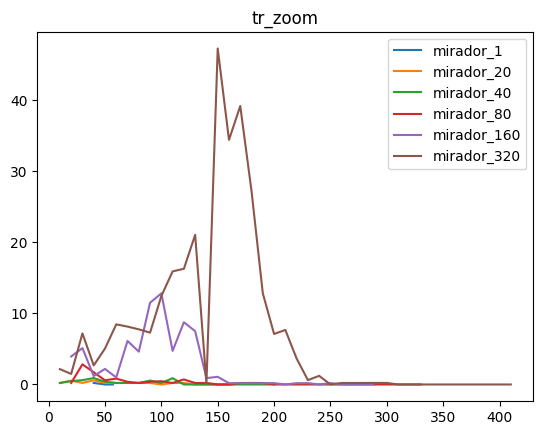

In [34]:
plt.figure()

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='tr_zoom')]
    plt.plot(df_plot['time'], df_plot['mean']/1000, label='mirador_'+str(test))
plt.legend()
plt.title('tr_zoom')
plt.show()

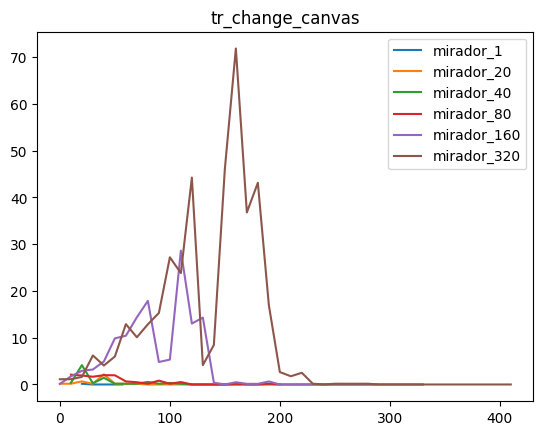

In [35]:
plt.figure()

for test in test_set:
    
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='tr_change_canvas')]
    plt.plot(df_plot['time'], df_plot['mean']/1000, label='mirador_'+str(test))
plt.legend()
plt.title('tr_change_canvas')
plt.show()

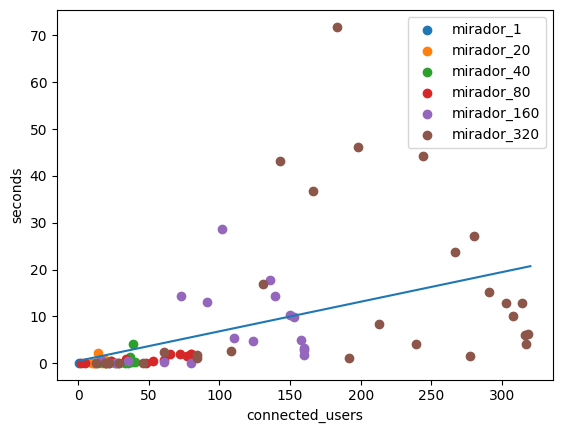

In [36]:
all_x = []
all_y = []
for test in test_set:
    df_data = df.loc[(df['users']==test) & (df['parameter']=='tr_change_canvas')]
    df_usr = df_users.loc[df_users['users']==test]   
    result = pd.merge(df_data[['users','time','mean']], df_usr, on=['users','time']) 
    result = result.loc[result['mean']!=0]
    all_x = np.concatenate((all_x, result['connected']), axis=None)
    all_y = np.concatenate((all_y, result['mean']/1000), axis=None)
    plt.scatter(result['connected'], result['mean']/1000, label='mirador_'+str(test))
    plt.xlabel('connected_users')
    plt.ylabel('seconds')
from sklearn.linear_model import LinearRegression
all_x = np.array(all_x).reshape((-1, 1))
reg = LinearRegression().fit(all_x, all_y)
x_pred = np.array(test_set).reshape((-1, 1))
plt.plot(test_set, reg.predict(x_pred))
plt.legend()

plt.show()


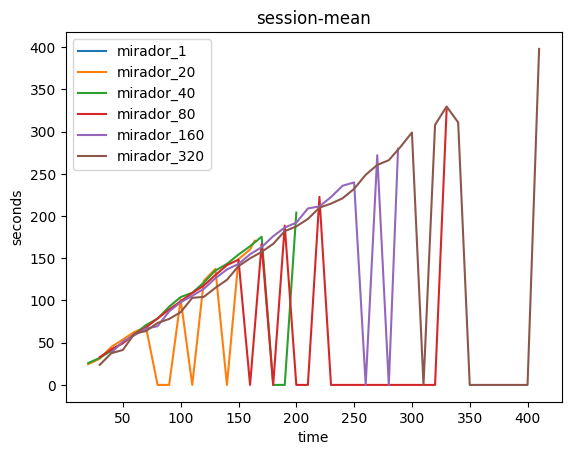

In [37]:
plt.figure()

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='session')]
    
    plt.plot(df_plot['time'], df_plot['mean']/1000, label='mirador_'+str(test))
plt.legend()
plt.title('session-mean')
plt.xlabel('time')
plt.ylabel('seconds')
plt.show()

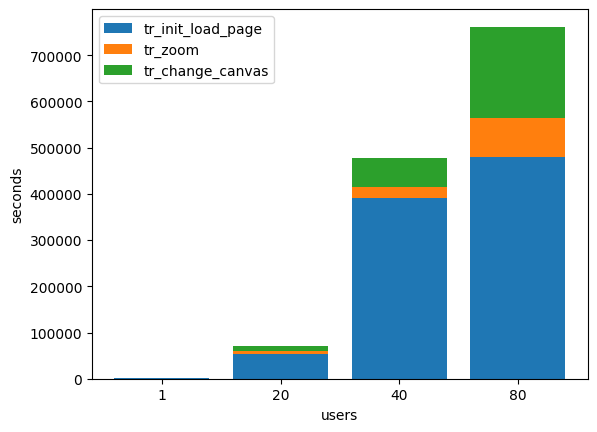

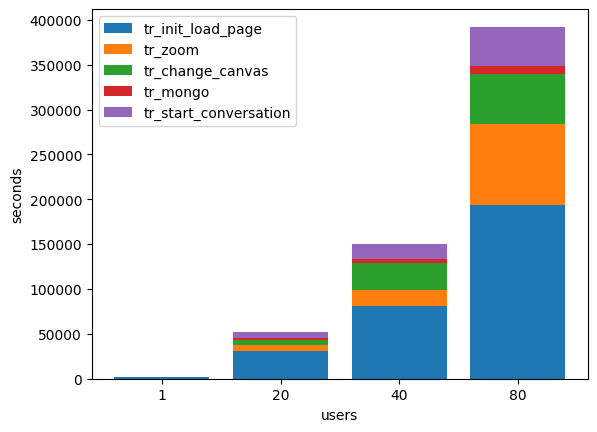

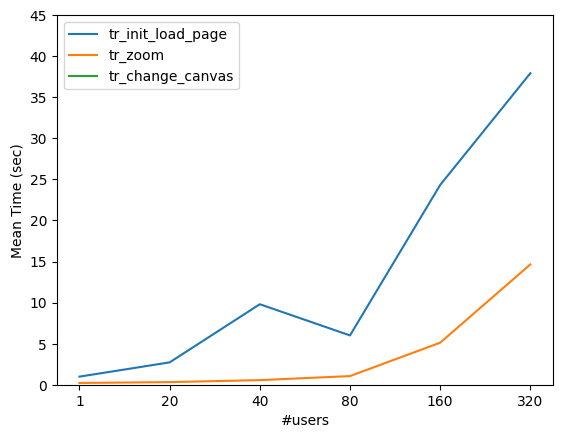

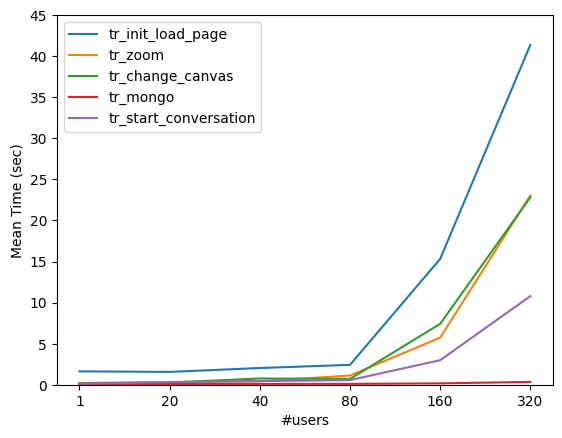

In [55]:

plt.figure()
cats = np.array(test_set).astype(str)
df_plot = df.loc[(df['parameter']=='session')]
idx =  df_plot.groupby(['users'])['time'].transform(max)==df_plot['time']
df_plot = df_plot[idx]
df_plot = df_plot[['parameter','users','meanfb','time','countfb']].drop_duplicates()    
session_values = np.array(df_plot['meanfb'])*np.array(df_plot['countfb'])
bottom = np.zeros(len(session_values))

bar_series = {}


for parameter in ['tr_init_load_page', 'tr_zoom']:
    df_plot = df.loc[(df['parameter']==parameter)]
    idx =  df_plot.groupby(['users'])['time'].transform(max)==df_plot['time']
    df_plot = df_plot[idx]
    df_plot = df_plot[['parameter','users','meanfb','time','countfb']].drop_duplicates()
    bar_series[parameter] = (np.array(df_plot['meanfb'])*np.array(df_plot['countfb']))
    session_values = session_values - np.array(df_plot['meanfb'])*np.array(df_plot['countfb'])



tr_change_canvas = np.zeros(len(session_values))   
count_change_canvas = np.zeros(len(session_values))
for parameter in ['tr_change_canvas', 'tr_change_manually_canvas_2','tr_change_manually_canvas']:
    df_plot = df.loc[(df['parameter']==parameter)]
    idx =  df_plot.groupby(['users'])['time'].transform(max)==df_plot['time']
    df_plot = df_plot[idx]
    df_plot = df_plot[['parameter','users','meanfb','time','countfb']].drop_duplicates()  
    tr_change_canvas = tr_change_canvas + np.array(df_plot['meanfb'])
    count_change_canvas = count_change_canvas + np.array(df_plot['countfb'])

bar_series['tr_change_canvas'] =( tr_change_canvas*count_change_canvas)/3

total_time = np.zeros(len(bar_series['tr_change_canvas'] ))
for i in range(len(total_time)):
    for parameter in bar_series.keys():
      total_time[i] += bar_series[parameter][i]



for parameter in bar_series.keys():
    plt.bar(cats[0:4],np.array(bar_series[parameter][0:4]), bottom=np.array(bottom[0:4]), label=parameter)
    bottom=bottom + bar_series[parameter]


bottom=bottom + (tr_change_canvas*count_change_canvas)/3
session_values = session_values - (tr_change_canvas*count_change_canvas)/3
# plt.bar(cats,session_values, bottom=bottom, label='others')

plt.legend()
# plt.title('session-mean')
plt.xlabel('users')
plt.ylabel('seconds')
plt.show()

# ----------------------
plt.figure()
cats = np.array(test_set).astype(str)
df_plot = df_cleo.loc[(df_cleo['parameter']=='session')]
idx =  df_plot.groupby(['users'])['time'].transform(max)==df_plot['time']
df_plot = df_plot[idx]
df_plot = df_plot[['parameter','users','meanfb','time','countfb']].drop_duplicates()
session_values = np.array(df_plot['meanfb'])*np.array(df_plot['countfb'])/1000
bottom = np.zeros(len(session_values))
bar_series = {}

for parameter in ['tr_init_load_page', 'tr_zoom', 'tr_change_canvas', 'tr_mongo', 'tr_start_conversation']:
    df_plot = df_cleo.loc[(df_cleo['parameter']==parameter)]
    idx =  df_plot.groupby(['users'])['time'].transform(max)==df_plot['time']
    df_plot = df_plot[idx]
    df_plot = df_plot[['parameter','users','meanfb','time','countfb']].drop_duplicates()
    bar_series[parameter] = (np.array(df_plot['meanfb'])*np.array(df_plot['countfb']))



total_time = np.zeros(len(bar_series['tr_change_canvas'] ))
for i in range(len(total_time)):
    for parameter in bar_series.keys():
      total_time[i] += bar_series[parameter][i]

for parameter in bar_series.keys():
    plt.bar(cats[0:4], bar_series[parameter][0:4], bottom=bottom[0:4], label=parameter)
    bottom=bottom + bar_series[parameter]

plt.legend()
# plt.title('session-mean')
plt.xlabel('users')
plt.ylabel('seconds')
plt.show()

#-------------------


plt.figure()
for parameter in ['tr_init_load_page', 'tr_zoom']:
    df_plot = df.loc[(df['parameter']==parameter)]
    idx =  df_plot.groupby(['users'])['time'].transform(max)==df_plot['time']
    df_plot = df_plot[idx]
    df_plot = df_plot[['parameter','users','meanfb','time']].drop_duplicates()            
    plt.plot(cats, df_plot['meanfb']/1000, label=parameter)
    bottom=bottom + np.array(df_plot['meanfb'])/1000
    session_values = session_values - np.array(df_plot['meanfb'])
plt.plot(cats, tr_change_canvas, label='tr_change_canvas')
plt.xlabel("#users")
plt.ylabel("Mean Time (sec)")
plt.ylim(0,45)
plt.legend()
plt.show()

plt.figure()
for parameter in ['tr_init_load_page', 'tr_zoom', 'tr_change_canvas','tr_mongo', 'tr_start_conversation']:
    df_plot = df_cleo.loc[(df_cleo['parameter']==parameter)]
    idx =  df_plot.groupby(['users'])['time'].transform(max)==df_plot['time']
    df_plot = df_plot[idx]
    df_plot = df_plot[['parameter','users','meanfb','time']].drop_duplicates()

    plt.plot(cats, df_plot['meanfb']/1000, label=parameter)
plt.xlabel("#users")
plt.ylabel("Mean Time (sec)")
plt.ylim(0,45)
plt.legend()
plt.show()

['1' '20' '40' '80' '160' '320']
[9.05985000e-01 5.95566360e+01 9.91705220e+01 4.37668428e+02
 2.03707213e+03 3.82786940e+03]
['1' '20' '40' '80' '160' '320']
[2.14990000e-01 4.85548200e+00 1.97845260e+01 4.19649723e+02
 8.64049134e+02 5.60697463e+03]


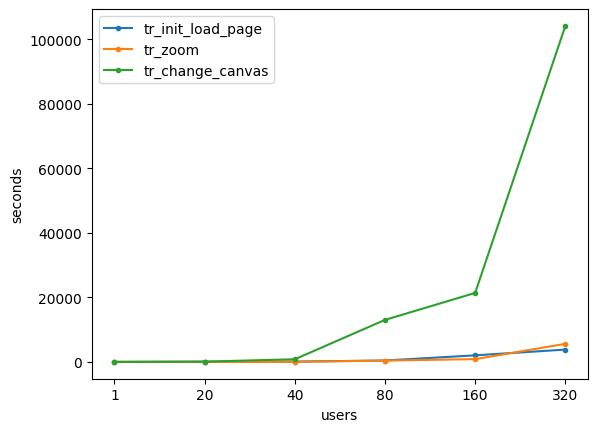

In [39]:
plt.figure()
test_set = [1, 20,40,80,160,320]
cats = np.array(test_set).astype(str)

for parameter in ['tr_init_load_page', 'tr_zoom']:
    df_plot = df_4.loc[(df_4['parameter']==parameter)]
    idx =  df_plot.groupby(['users'])['time'].transform(max)==df_plot['time']
    df_plot = df_plot[idx]
    df_plot = df_plot[['parameter','users','meanfb','time','countfb']].drop_duplicates()           
    values = np.array(df_plot['meanfb'])*np.array(df_plot['countfb'])/1000
    print(cats)
    print(values)
    plt.plot(cats, values,'.-',  label=parameter)
   
tr_change_canvas = np.zeros(len(session_values))   
count_change_canvas = np.zeros(len(session_values))  
for parameter in ['tr_change_canvas', 'tr_change_manually_canvas_2','tr_change_manually_canvas']:
    df_plot = df_4.loc[(df_4['parameter']==parameter)]
    idx =  df_plot.groupby(['users'])['time'].transform(max)==df_plot['time']
    df_plot = df_plot[idx]
    df_plot = df_plot[['parameter','users','meanfb','time','countfb']].drop_duplicates()  
    tr_change_canvas = tr_change_canvas + np.array(df_plot['meanfb'])/1000
    count_change_canvas = count_change_canvas + np.array(df_plot['countfb'])
    
plt.plot(cats,( tr_change_canvas*count_change_canvas)/tr_change_canvas[0],'.-', label='tr_change_canvas')


# plt.yscale('log')
plt.legend()
plt.xlabel('users')
plt.ylabel('seconds')
plt.show()

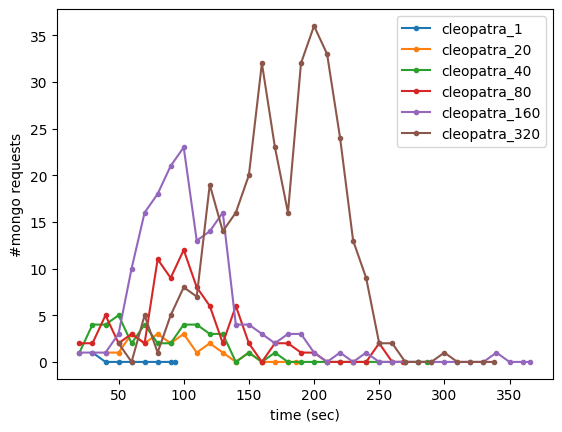

In [40]:
plt.figure()
for test in test_set:
    df_plot = df_cleo.loc[(df_cleo['users']==test) & (df_cleo['parameter']=='tr_mongo')]
    plt.plot(df_plot['time'], df_plot['countfb'].diff(),'.-', label='cleopatra_'+str(test))
    plt.xlabel("time (sec)")
    plt.ylabel("#mongo requests")
plt.legend()
plt.show()

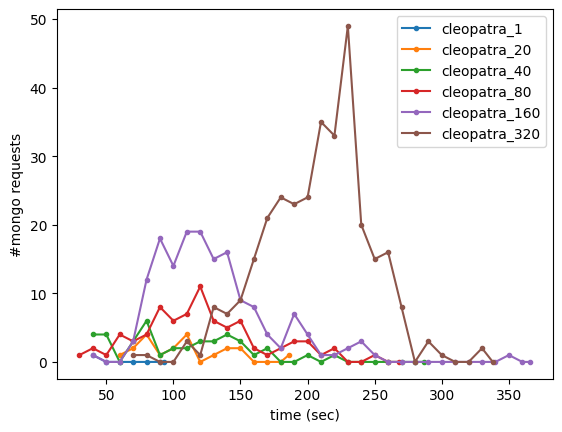

In [41]:
plt.figure()
for test in test_set:
    df_plot = df_cleo.loc[(df_cleo['users']==test) & (df_cleo['parameter']=='tr_start_conversation')]
    plt.plot(df_plot['time'], df_plot['countfb'].diff(),'.-', label='cleopatra_'+str(test))
    plt.xlabel("time (sec)")
    plt.ylabel("#mongo requests")
plt.legend()
plt.show()

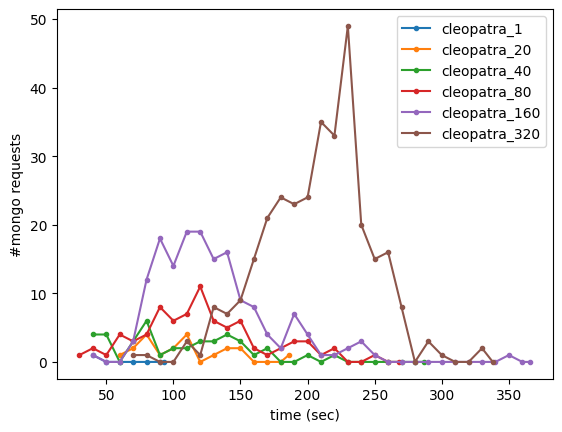

In [42]:
plt.figure()
for test in test_set:
    df_plot = df_cleo.loc[(df_cleo['users']==test) & (df_cleo['parameter']=='tr_start_conversation')]
    plt.plot(df_plot['time'], df_plot['countfb'].diff(),'.-', label='cleopatra_'+str(test))
    plt.xlabel("time (sec)")
    plt.ylabel("#mongo requests")
plt.legend()
plt.show()